In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('surveyy.csv')
df.head()

,Education background,Previous online experience,Online learning challenges,Overcoming challenges,Type of learning content,Duration of learning content,Preferred content style,Assessment,Learning duration per week,Preffered learning style,Instructor support,Certification
0,Others,Yes,Lack of resources,Yes,I would like courses that focus on practical s...,I prefer short lessons.,Pre recorded videos,Yes,4-5 hours,Self-paced,It depends on the content and the format of th...,Yes
1,Others,Yes,Lack of funds,Yes,I would like courses that focus on practical s...,I am open to either type of lessons,Live videos,Yes,1-3 hours,Instructor-led,Yes instructor support would be beneficial.,Yes
2,Others,Yes,Lack of funds,No,I would like courses that cover a broad range ...,I am open to either type of lessons,Pre recorded videos,Yes,Above 5 hours,Self-paced,It depends on the content and the format of th...,Yes
3,Others,Yes,Lack of resources,Yes,I would like courses that cover a broad range ...,I am open to either type of lessons,Pre recorded videos,Yes,4-5 hours,Self-paced,Yes instructor support would be beneficial.,Yes
4,Others,Yes,Lack of resources,Yes,I would like courses that are tailored to my s...,I am open to either type of lessons,Live videos,Yes,4-5 hours,Instructor-led,Yes instructor support would be beneficial.,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Education background          191 non-null    object
 1   Previous online experience    191 non-null    object
 2   Online learning challenges    191 non-null    object
 3   Overcoming challenges         191 non-null    object
 4   Type of learning content      191 non-null    object
 5   Duration of learning content  191 non-null    object
 6   Preferred content style       191 non-null    object
 7   Assessment                    191 non-null    object
 8   Learning duration per week    191 non-null    object
 9   Preffered learning style      191 non-null    object
 10  Instructor support            191 non-null    object
 11  Certification                 191 non-null    object
dtypes: object(12)
memory usage: 18.0+ KB


In [5]:
df.describe()

,Education background,Previous online experience,Online learning challenges,Overcoming challenges,Type of learning content,Duration of learning content,Preferred content style,Assessment,Learning duration per week,Preffered learning style,Instructor support,Certification
count,191,191,191,191,191,191,191,191,191,191,191,191
unique,4,2,3,2,3,3,3,3,3,2,3,3
top,Others,Yes,Lack of funds,Yes,I would like courses that focus on practical s...,I am open to either type of lessons,Pre recorded videos,Yes,1-3 hours,Instructor-led,Yes instructor support would be beneficial.,Yes
freq,122,146,95,132,86,90,103,152,73,106,129,165


In [6]:
df.isnull().sum()

Education background            0
Previous online experience      0
Online learning challenges      0
Overcoming challenges           0
Type of learning content        0
Duration of learning content    0
Preferred content style         0
Assessment                      0
Learning duration per week      0
Preffered learning style        0
Instructor support              0
Certification                   0
dtype: int64

In [7]:
profile = ProfileReport(df, title='ProfileReport')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

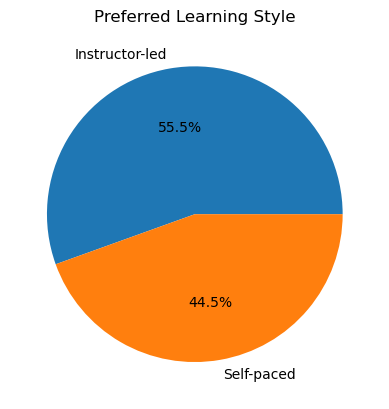

In [8]:
# Pie chart for Preferred Learning Style
df['Preffered learning style'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Preferred Learning Style')
plt.ylabel('')
plt.show();

from the chart 55% preferred instructor led learning while 44.5% preferred seld paced learning, i will say its a close match

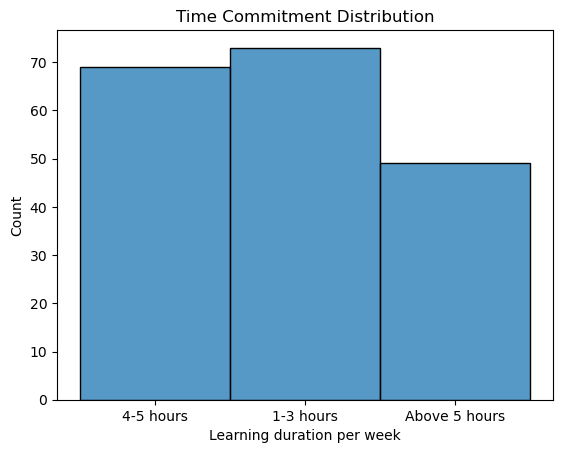

In [9]:
# Histogram for Time Commitment per week
sns.histplot(data=df, x='Learning duration per week')
plt.title('Time Commitment Distribution')
plt.show()


from our survey responses, more people will be committed to learning 1 to 3 hours weekly

In [10]:
# Cross-tabulation between Education Background and Preferred Learning Style
cross_tab = pd.crosstab(df['Education background'], df['Preffered learning style'])
print(cross_tab)

Preffered learning style  Instructor-led  Self-paced
Education background                                
Elementary School                      1           5
High School                           21          23
Middle School                          9          10
Others                                75          47


this crosstab shows tabulation comparing ducation background and preferred learning style, 1 person in elementary preferred instructor led, while 5 want self paced, from high schoolers 21 prefers instructor led while 23 preferred self_paced, 
middle schoolers 9 wants intructor led and 10 want self paced then comes others

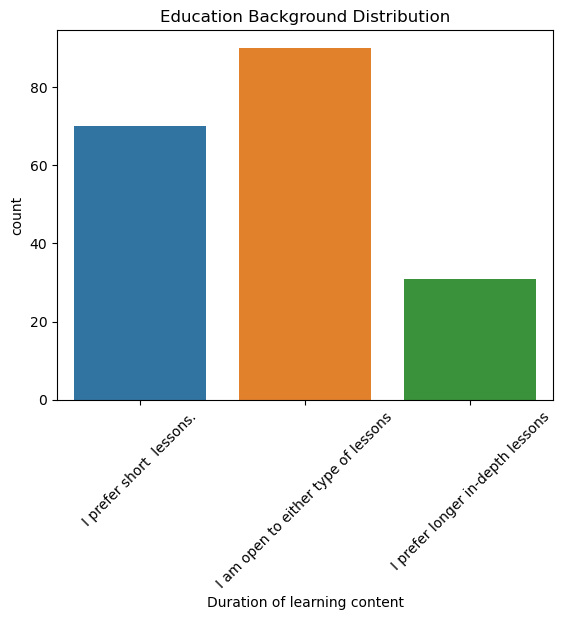

In [11]:
sns.countplot(x='Duration of learning content', data=df)
plt.title('Education Background Distribution')
plt.xticks(rotation=45)
plt.show()

# You can create similar plots for other object columns.


# FITTING OUR DATAFRAME INTO MACHINE LEARNING MODELS TO MAKE PREDICTIONS BACED ON OVERCOMING CHALLENGES OF EDUCATION WHICH IS THE GOAL OF EMPOWERED

In [12]:
#impoting librabries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [16]:
# Convert all categorical columns to numeric using LabelEncoder
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])


In [17]:
np.random.seed(42)

In [18]:
## Separate the target variable from the features
x = df.drop('Overcoming challenges', axis=1)
y = df['Overcoming challenges']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [19]:
# Initialize the machine learning model (in this case, Decision Tree Classifier)
model = RandomForestClassifier()


In [20]:
# Train the model on the training data
model.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [23]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Model Accuracy:", accuracy)

Model Accuracy: 66.66666666666666


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.40      0.38        10
           1       0.79      0.76      0.77        29

    accuracy                           0.67        39
   macro avg       0.57      0.58      0.58        39
weighted avg       0.68      0.67      0.67        39



In [25]:
confusion_matrix(y_test, y_pred)

array([[ 4,  6],
       [ 7, 22]], dtype=int64)

In [26]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [27]:
#using GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier


# Separate the target variable from the features
x = df.drop('Overcoming challenges', axis=1)
y = df['Overcoming challenges']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingClassifier
model = GradientBoostingClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Model Accuracy:", accuracy)


Model Accuracy: 69.23076923076923


In [28]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier



## Separate the target variable from the features
x = df.drop('Overcoming challenges', axis=1)
y = df['Overcoming challenges']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Initialize the GradientBoostingClassifier
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Model Accuracy:", accuracy)

Model Accuracy: 69.23076923076923


In [29]:
#using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Separate the target variable from the features
x = df.drop('Overcoming challenges', axis=1)
y = df['Overcoming challenges']


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Model Accuracy:", accuracy)


Model Accuracy: 71.7948717948718


In [30]:
# performing hyperparameter tuning using GridSearchCV in scikit-learn:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Separate the target variable from the features
x = df.drop('Overcoming challenges', axis=1)
y = df['Overcoming challenges']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier model
model = RandomForestClassifier()

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 79.48717948717949


we tried different machine learning models to check for the one that will give us higher accuracy score, RandomForestClassifier did 
after using hyperparameters to tune it

In [31]:
#save a content and load it
import pickle
pickle_out = open('randomforest.pkl','wb')

In [33]:
pickle.dump(model,pickle_out)
pickle_out.close()